In [5]:
import cv2, glob, os
import scipy, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from multiprocessing import Pool, cpu_count
from PIL import Image, ImageStat, PngImagePlugin
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
from skimage.io import imread, imshow, imsave

In [6]:
data_path = '/var/local/pgladkov/camera_model/data'

In [7]:
train_path = data_path + '/train'
test_path = data_path + '/test'

In [9]:
cameras = os.listdir(train_path)

train_images = []
for camera in cameras:
    for fname in sorted(os.listdir(train_path + '/' + camera)):
        train_images.append((camera, fname))

train = pd.DataFrame(train_images, columns=['camera', 'fname'])
print(train.shape)

(2750, 2)


In [10]:
test_images = []
for fname in sorted(os.listdir(test_path)):
    test_images.append(fname)

test = pd.DataFrame(test_images, columns=['fname'])
print(test.shape)

(2640, 1)


## Train

In [18]:
train.head()

,camera,fname
0,Motorola-Nexus-6,(MotoNex6)1.jpg
1,Motorola-Nexus-6,(MotoNex6)10.jpg
2,Motorola-Nexus-6,(MotoNex6)100.jpg
3,Motorola-Nexus-6,(MotoNex6)101.jpg
4,Motorola-Nexus-6,(MotoNex6)102.jpg


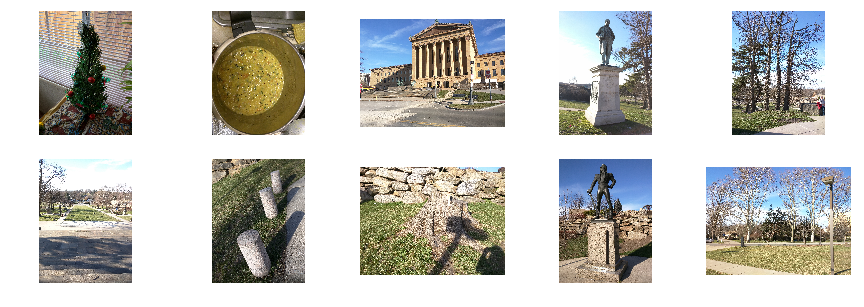

In [21]:
f,ax = plt.subplots(2,5, figsize=(15,5))
for i in range(10):
    img = imread(train_path + '/' + train['camera'][i] + '/' + train['fname'][i])
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
plt.show()  

## Test

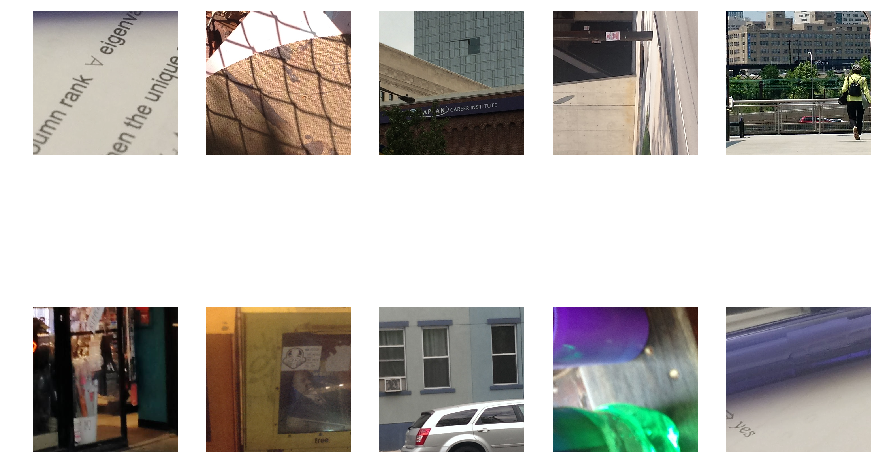

In [20]:
f,ax = plt.subplots(2,5, figsize=(15,10))
for i in range(10):
    # Use PIL to read the tiff file
    img = Image.open(test_path +'/' + test["fname"][i])
    img = np.array(img)
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
plt.show()